In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [974]:
df_tr = pd.read_csv('/Users/vlad3d/Hackatons/PANDEMIC_HACK/data/pandemicdatahack/train.csv',sep=';',encoding='utf-8')

In [878]:
df_tr.head()

,id,position,region,industry,locality,locality_name,education_type,drive_licences,citizenship,schedule,...,relocation_ready,travel_ready,retraining_ready,is_worldskills_participant,has_qualifications,completeness_rate,creation_date,modification_date,publish_date,salary
0,0,Специалист,Тульская область,"Государственная служба, некоммерческие организ...",7100000100000,Тула,Незаконченное высшее,[B],Российская Федерация,Полный рабочий день,...,False,False,True,NaN,NaN,64.0,2020-05-07,2020-05-08,2020-05-07,37500
1,1,Лаборант,Алтайский край,"Государственная служба, некоммерческие организ...",2200000100000,Барнаул,Высшее,[B],Российская Федерация,Полный рабочий день,...,False,True,True,NaN,NaN,88.0,2020-10-21,2020-10-27,2020-10-27,14000
2,3,"Специалист, администратор, бухгалтер, экономист",Ульяновская область,"Административная работа, секретариат, АХО",7300000200000,Димитровград,Высшее,[B],Российская Федерация,Полный рабочий день,...,False,NaN,True,NaN,NaN,78.0,2019-04-25,2020-02-04,2020-02-04,24600
3,4,Специалист,Свердловская область,"Государственная служба, некоммерческие организ...",6600002300000,Нижний Тагил,Высшее,[B],Российская Федерация,Полный рабочий день,...,False,False,False,NaN,NaN,91.0,2020-09-19,2020-09-20,2020-09-19,16075
4,5,Инструктор по плаванию,Иркутская область,"Здравоохранение, спорт, красота, социальное об...",3800000400000,Ангарск,NaN,NaN,Российская Федерация,Полный рабочий день,...,False,NaN,NaN,NaN,NaN,58.0,2020-04-20,2020-09-09,2020-04-21,22080


In [799]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306270 entries, 0 to 306269
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          306270 non-null  int64  
 1   position                    306270 non-null  object 
 2   region                      306258 non-null  object 
 3   industry                    306270 non-null  object 
 4   locality                    306270 non-null  int64  
 5   locality_name               290778 non-null  object 
 6   education_type              266238 non-null  object 
 7   drive_licences              121925 non-null  object 
 8   citizenship                 306270 non-null  object 
 9   schedule                    306270 non-null  object 
 10  employement_type            306270 non-null  object 
 11  age                         298459 non-null  float64
 12  gender                      298497 non-null  object 
 13  experience    

In [37]:
df_tr.describe()

,id,locality,age,experience,salary_desired,completeness_rate,salary
count,306270.000000,3.062700e+05,298459.000000,306270.000000,3.062700e+05,306270.000000,3.062700e+05
mean,218700.540370,4.778910e+12,35.661344,5.748225,3.364235e+04,69.068528,4.094132e+04
std,126304.952581,2.352877e+12,12.616996,7.745237,2.272811e+04,17.125725,3.535889e+04
min,0.000000,0.000000e+00,2.000000,0.000000,-8.304000e+04,0.000000,0.000000e+00
25%,109335.250000,2.400002e+12,28.000000,0.000000,2.000000e+04,61.000000,2.162300e+04
50%,218685.500000,5.200000e+12,34.000000,3.000000,3.000000e+04,71.000000,3.091200e+04
75%,328055.750000,6.600002e+12,42.000000,9.000000,4.000000e+04,81.000000,4.750000e+04
max,437525.000000,9.900000e+12,1936.000000,937.000000,1.069556e+06,100.000000,2.283641e+06


In [38]:
df_tr.dtypes

id                              int64
position                       object
region                         object
industry                       object
locality                        int64
locality_name                  object
education_type                 object
drive_licences                 object
citizenship                    object
schedule                       object
employement_type               object
age                           float64
gender                         object
experience                      int64
salary_desired                  int64
relocation_ready               object
travel_ready                   object
retraining_ready               object
is_worldskills_participant     object
has_qualifications             object
completeness_rate             float64
creation_date                  object
modification_date              object
publish_date                   object
salary                          int64
dtype: object

In [975]:
df_tr['creation_date'] = pd.to_datetime(df_tr['creation_date'])
df_tr['modification_date'] = pd.to_datetime(df_tr['modification_date'])
df_tr['publish_date'] = pd.to_datetime(df_tr['publish_date'])

In [976]:
df_tr['relocation_ready'] = df_tr['relocation_ready'].astype('bool')
df_tr['travel_ready'] = df_tr['travel_ready'].astype('bool')
df_tr['has_qualifications'] = df_tr['has_qualifications'].astype('bool')
df_tr['retraining_ready'] = df_tr['retraining_ready'].astype('bool')


In [257]:
df_tr.dtypes

id                                     int64
position                              object
region                                object
industry                              object
locality                               int64
locality_name                         object
education_type                        object
drive_licences                        object
citizenship                           object
schedule                              object
employement_type                      object
age                                  float64
gender                                object
experience                             int64
salary_desired                         int64
relocation_ready                        bool
travel_ready                            bool
retraining_ready                        bool
is_worldskills_participant            object
has_qualifications                      bool
completeness_rate                    float64
creation_date                 datetime64[ns]
modificati

In [258]:
def value_counter(df,columns):
    print('Колонка {}'.format(columns))
    print(df[columns].value_counts().head())
    print('Количество величин {}'.format(len(df[columns].value_counts())))
    print('Количество NAN - {}'.format(df[columns].isna().sum()))
    print('**********************')
    print()
def stats(df,columns):
    print('Mean ',df[columns].mean())
    #print('Moda ',df[columns].mode())
    print('median ',df[columns].median())

In [802]:
for elem in df_tr.columns:
    value_counter(df_tr,elem)

Колонка id
2047      1
250927    1
205873    1
212018    1
209971    1
Name: id, dtype: int64
Количество величин 306270
Количество NAN - 0
**********************

Колонка position
Специалист       10098
Бухгалтер         7785
Администратор     6694
Менеджер          6555
Продавец          5022
Name: position, dtype: int64
Количество величин 77762
Количество NAN - 0
**********************

Колонка region
Краснодарский край    20535
Пермский край         16324
г. Санкт-Петербург    14766
Ростовская область    14624
г. Москва             10873
Name: region, dtype: int64
Количество величин 86
Количество NAN - 12
**********************

Колонка industry
Административная работа, секретариат, АХО               32695
Продажи, закупки, снабжение, торговля                   32195
Государственная служба, некоммерческие организации      22300
Транспорт, автобизнес, логистика, склад, ВЭД            19432
Финансы, кредит, страхование, пенсионное обеспечение    18503
Name: industry, dtype: int64
Коли

In [937]:
df_tr.describe()

,id,locality,age,experience,salary_desired,completeness_rate,salary
count,306270.000000,3.062700e+05,298459.000000,306270.000000,3.062700e+05,306270.000000,3.062700e+05
mean,218700.540370,4.778910e+12,35.661344,5.748225,3.364235e+04,69.068528,4.094132e+04
std,126304.952581,2.352877e+12,12.616996,7.745237,2.272811e+04,17.125725,3.535889e+04
min,0.000000,0.000000e+00,2.000000,0.000000,-8.304000e+04,0.000000,0.000000e+00
25%,109335.250000,2.400002e+12,28.000000,0.000000,2.000000e+04,61.000000,2.162300e+04
50%,218685.500000,5.200000e+12,34.000000,3.000000,3.000000e+04,71.000000,3.091200e+04
75%,328055.750000,6.600002e+12,42.000000,9.000000,4.000000e+04,81.000000,4.750000e+04
max,437525.000000,9.900000e+12,1936.000000,937.000000,1.069556e+06,100.000000,2.283641e+06


In [938]:
df_tr_digit = df_tr[['age','experience','salary_desired','completeness_rate','salary']]

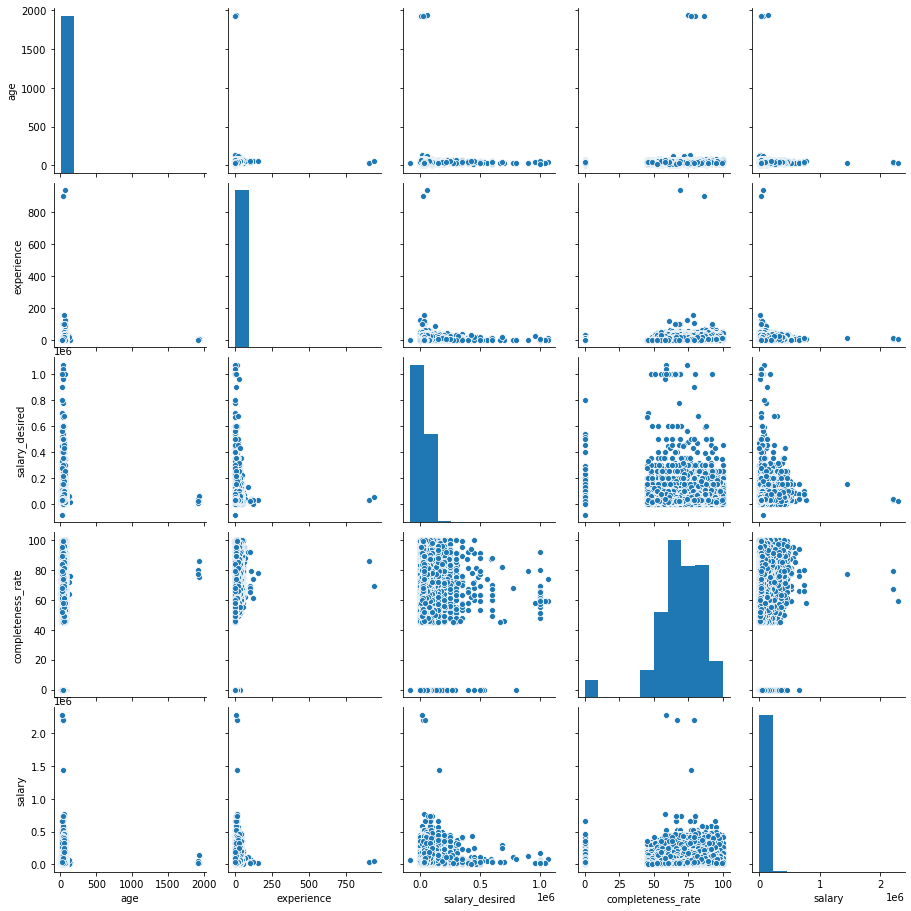

In [939]:
sns.pairplot(df_tr_digit)

In [977]:
df_tr.age.value_counts().tail()

3.0       1
1926.0    1
1924.0    1
2.0       1
7.0       1
Name: age, dtype: int64

In [978]:
wrong_age = []
for elem in df_tr.age:
    if (elem > 82) | (elem < 14):
        wrong_age.append(elem)
print('We have {} wrong ages'.format(len(wrong_age)))
wrong_age = list(set(wrong_age))

We have 28 wrong ages


In [979]:
df_tr.age = np.where((df_tr.age>82)| (elem < 14) ,35,df_tr.age)
# df_tr.age = np.where((df_tr.age==5),50,df_tr.age)
# df_tr.age = np.where((df_tr.age==119),19,df_tr.age)
# df_tr.age = np.where((df_tr.age==1936),36,df_tr.age)
# df_tr.age = np.where((df_tr.age==1926),26,df_tr.age)
# df_tr.age = np.where((df_tr.age==3),30,df_tr.age)
# df_tr.age = np.where((df_tr.age==8),18,df_tr.age)
# df_tr.age = np.where((df_tr.age==1924),24,df_tr.age)
# df_tr.age = np.where((df_tr.age==132),32,df_tr.age)
# df_tr.age = np.where((df_tr.age==1933),33,df_tr.age)
# df_tr.age = np.where((df_tr.age==2),20,df_tr.age)
# df_tr.age = np.where((df_tr.age==7),17,df_tr.age)
# df_tr.age = np.where((df_tr.age==1928),28,df_tr.age)

In [980]:
#df_tr = df_tr[~df_tr.age.isin(wrong_age)]
df_tr.age.value_counts().tail(5)

2.0     1
3.0     1
82.0    1
8.0     1
7.0     1
Name: age, dtype: int64

In [962]:
stats(df_tr,'age')

Mean  35.628719522614496
median  34.0


In [981]:
df_tr.age = df_tr.age.fillna(35)
df_tr.age.isna().sum()

0

In [982]:
len(df_tr[df_tr.experience > 69])

13

In [983]:
wrong_exp = []
for elem in df_tr.experience:
    if (elem > 69):
        wrong_exp.append(elem)
print('We have {} wrong exp'.format(len(wrong_exp)))
wrong_exp = list(set(wrong_exp))

We have 13 wrong exp


In [984]:
#df_tr = df_tr[~df_tr.experience.isin(wrong_exp)]
df_tr.experience = np.where((df_tr.experience>69),0,df_tr.experience)

df_tr.experience.value_counts().tail()

64    1
65    1
59    1
56    1
66    1
Name: experience, dtype: int64

In [985]:
print(stats(df_tr,'salary_desired'))
print(stats(df_tr,'salary'))

Mean  33642.353557318704
median  30000.0
None
Mean  40941.32367845365
median  30912.0
None


In [988]:
#df_tr.info()

In [986]:
df_tr = df_tr[df_tr.salary > 0]

In [953]:
df_tr.salary_desired = np.where((df_tr.salary_desired<1000),30000,df_tr.salary_desired)
df_tr.salary = np.where((df_tr.salary<1000),31000,df_tr.salary)#!!!!латер!!
df_tr.salary = np.where((df_tr.salary>1000000),31000,df_tr.salary)#!!!later

In [989]:
df_tr.describe()

,id,locality,age,experience,salary_desired,completeness_rate,salary
count,303852.000000,3.038520e+05,303852.000000,303852.000000,3.038520e+05,303852.000000,3.038520e+05
mean,218683.809404,4.779352e+12,35.611225,5.739794,3.363126e+04,69.078331,4.126713e+04
std,126304.012138,2.351677e+12,9.821518,7.358616,2.268407e+04,17.103623,3.530943e+04
min,0.000000,0.000000e+00,2.000000,0.000000,-8.304000e+04,0.000000,2.000000e+00
25%,109333.750000,2.400002e+12,28.000000,0.000000,2.000000e+04,61.000000,2.200000e+04
50%,218668.500000,5.200000e+12,34.000000,3.000000,3.000000e+04,71.000000,3.105000e+04
75%,328015.250000,6.600002e+12,42.000000,9.000000,4.000000e+04,81.000000,4.800000e+04
max,437525.000000,9.900000e+12,82.000000,66.000000,1.069556e+06,100.000000,2.283641e+06


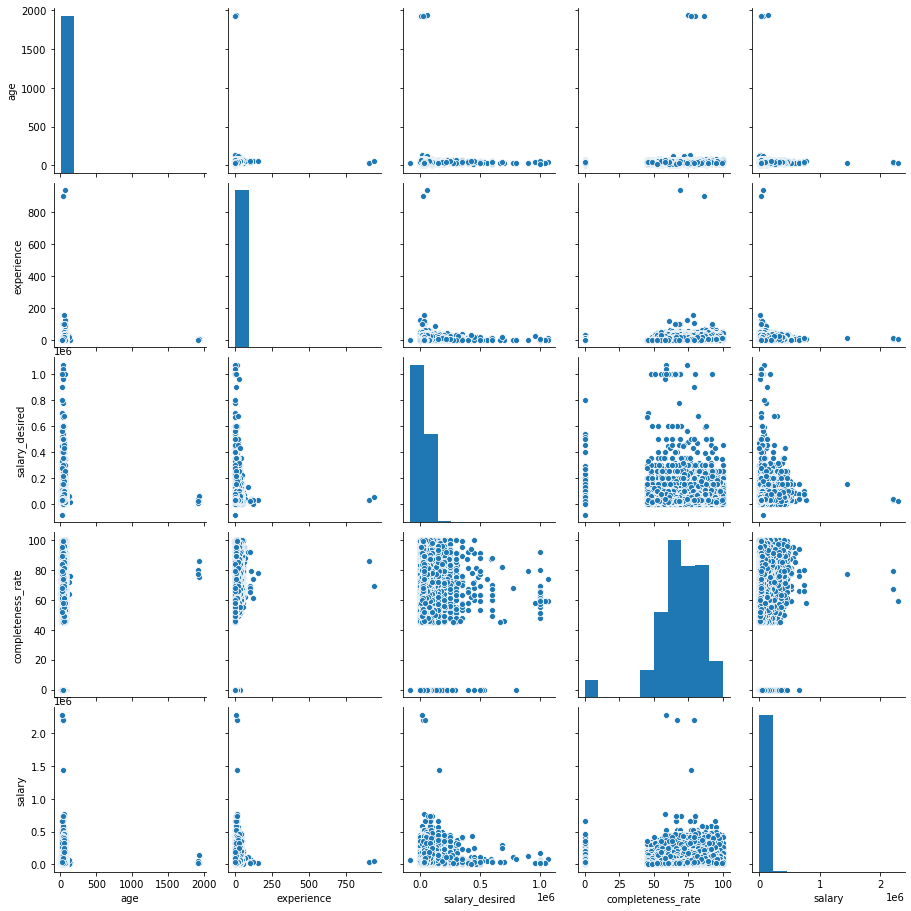

In [1016]:
sns.pairplot(df_tr_digit)

In [990]:
#df_tr_text[df_tr_text.position.str.contains('водитель')].position.value_counts().head(50) # - слова по вхождению.
df_tr[df_tr.position.str.len() > 200].position.value_counts().count()  # - большая длинна

73

In [991]:
#cпециалист
#df_tr = df_tr[df_tr.position.str.len() < 200] 
df_tr.position = np.where((df_tr.position.str.len()>200),'специалист',df_tr.position)
df_tr[df_tr.position.str.len() > 200].position.value_counts().count()

0

In [992]:
df_tr.region = df_tr.region.fillna(df_tr.region.value_counts().index[0])
df_tr.creation_date = df_tr.creation_date.fillna(df_tr.creation_date.value_counts().index[0])
df_tr.modification_date = df_tr.modification_date.fillna(df_tr.modification_date.value_counts().index[0])

In [993]:
df_tr.locality_name = np.where((df_tr.region=='Республика Башкортостан'),'уфа',df_tr.locality_name)
df_tr.locality_name = np.where((df_tr.region=='Республика Дагестан'),'махачкала',df_tr.locality_name)
df_tr.locality_name = np.where((df_tr.region=='Республика Бурятия'),'улан-удэ',df_tr.locality_name)
df_tr.locality_name = np.where((df_tr.region=='Республика Адыгея'),'майкоп',df_tr.locality_name)
df_tr.locality_name = np.where((df_tr.region=='Республика Алтай'),'горно-алтайск',df_tr.locality_name)
df_tr.locality_name = np.where((df_tr.region=='Республика Карачаево-Черкесия'),'черкесск',df_tr.locality_name)
df_tr.locality_name = np.where((df_tr.region=='Республика Кабардино-Балкария'),'нальчик',df_tr.locality_name)
df_tr.locality_name = np.where((df_tr.region=='Республика Калмыкия'),'элиста',df_tr.locality_name)

In [ ]:
missed_local_city = ['уфа','махачкала','улан-удэ','майкоп','горно-алтайск','черкесск','нальчик','элиста']

In [994]:
df_tr.locality_name = df_tr.locality_name.fillna(df_tr.locality_name.value_counts().index[0])

In [995]:
df_tr.education_type = df_tr.education_type.ffill(axis = 0)
df_tr.gender = df_tr.gender.ffill(axis = 0)

In [996]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303852 entries, 0 to 306269
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   id                          303852 non-null  int64         
 1   position                    303852 non-null  object        
 2   region                      303852 non-null  object        
 3   industry                    303852 non-null  object        
 4   locality                    303852 non-null  int64         
 5   locality_name               303852 non-null  object        
 6   education_type              303852 non-null  object        
 7   drive_licences              121013 non-null  object        
 8   citizenship                 303852 non-null  object        
 9   schedule                    303852 non-null  object        
 10  employement_type            303852 non-null  object        
 11  age                         303852 non-

In [1004]:
df_tr.to_pickle('clean_train_1912')

In [997]:
custom_feature_cols = ['position_industry','position_industry_region',
                       'position_industry_region_locality','region_locality_name',
                      'schedule_employement_type'] 

In [998]:
c1 = df_tr.position +','+' '+ df_tr.industry
c2 = df_tr.position +','+' '+ df_tr.industry +','+' '+ df_tr.region
c3 = df_tr.position +','+' '+ df_tr.industry +','+' '+ df_tr.region +','+' '+ df_tr.locality_name
c4 = df_tr.region +','+' '+ df_tr.locality_name
c5 = df_tr.schedule +','+' '+ df_tr.employement_type

In [1000]:
df_custom_features = pd.DataFrame(columns=custom_feature_cols)


In [1001]:
df_custom_features.head()

,position_industry,position_industry_region,position_industry_region_locality,region_locality_name,schedule_employement_type


In [1002]:
df_custom_features.position_industry = c1
df_custom_features.position_industry_region = c2
df_custom_features.position_industry_region_locality = c3
df_custom_features.region_locality_name = c4
df_custom_features.schedule_employement_type = c5

In [1003]:
df_custom_features.head(1)

,position_industry,position_industry_region,position_industry_region_locality,region_locality_name,schedule_employement_type
0,"Специалист, Государственная служба, некоммерче...","Специалист, Государственная служба, некоммерче...","Специалист, Государственная служба, некоммерче...","Тульская область, Тула","Полный рабочий день, Полная занятость"


In [1005]:
df_custom_features.shape

(303852, 5)

In [1006]:
import nltk
from nltk.corpus import stopwords

In [1007]:
stop = stopwords.words('russian')
stemmer = nltk.stem.snowball.RussianStemmer('russian')

In [468]:
def data_Stemmer(text):
    return ' '.join([stemmer.stem(word) for word in text.split(' ') if word not in stop])
import string

In [1009]:
df_custom_features.position_industry_region = df_custom_features.position_industry_region.astype(str)
df_custom_features.position_industry_region_locality = df_custom_features.position_industry_region_locality.astype(str)
df_custom_features.region_locality_name = df_custom_features.region_locality_name.astype(str)
df_custom_features.position_industry_region = df_custom_features.position_industry_region.str.replace(r'\d+', '')
df_custom_features.position_industry_region_locality = df_custom_features.position_industry_region_locality.str.replace('\d+', '')
df_custom_features.region_locality_name = df_custom_features.region_locality_name.str.replace('\d+', '')

In [1010]:
df_custom_features.position_industry_region = df_custom_features.position_industry_region.apply(lambda x: x.lower().replace('unknown', ''))
df_custom_features.position_industry_region_locality = df_custom_features.position_industry_region_locality.apply(lambda x: x.lower().replace('unknown', ''))
df_custom_features.region_locality_name = df_custom_features.region_locality_name.apply(lambda x: x.lower().replace('unknown', ''))
df_custom_features.position_industry = df_custom_features.position_industry.apply(lambda x: x.lower().replace('unknown', ''))
df_custom_features.schedule_employement_type = df_custom_features.schedule_employement_type.apply(lambda x: x.lower().replace('unknown', ''))

In [1011]:
df_custom_features.position_industry = df_custom_features.position_industry.apply(lambda x: data_Stemmer(x))
df_custom_features.schedule_employement_type = df_custom_features.schedule_employement_type.apply(lambda x: data_Stemmer(x))

df_custom_features.position_industry_region = df_custom_features.position_industry_region.apply(lambda x: data_Stemmer(x))
df_custom_features.position_industry_region_locality = df_custom_features.position_industry_region_locality.apply(lambda x: data_Stemmer(x))
df_custom_features.region_locality_name = df_custom_features.region_locality_name.apply(lambda x: data_Stemmer(x))

In [1014]:
df_custom_features.to_pickle('before_vectorize_df_1912')

In [475]:
#df_custom_features.schedule_employement_type = df_custom_features.schedule_employement_type.apply(lambda x: data_Stemmer(x))

In [534]:
#df_custom_features.position_industry_region = df_custom_features.position_industry_region.apply(lambda x: data_Stemmer(x))
#df_custom_features.position_industry_region_locality = df_custom_features.position_industry_region_locality.apply(lambda x: data_Stemmer(x))
#df_custom_features.region_locality_name = df_custom_features.region_locality_name.apply(lambda x: data_Stemmer(x))

In [542]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
tf_vectorizer = TfidfVectorizer(stop_words=stop, ngram_range=(1, 2), min_df=0.01, norm='l2')

In [543]:
df_custom_features.shape

(300704, 5)

In [544]:
df_tr.shape

(300704, 25)

In [545]:
X = df_custom_features
y = df_tr.salary

In [546]:
Xtr, Xval, ytr, yval  = train_test_split(X, y, test_size=0.30, random_state=42)

In [547]:
Xtr_tfidf = tf_vectorizer.fit_transform(Xtr)
Xval_tfidf = tf_vectorizer.transform(Xval)
Xtr_tfidf.shape, Xval_tfidf.shape

((5, 5), (5, 5))

In [548]:
X.shape

(300704, 5)

In [549]:
from sklearn.linear_model import SGDClassifier, LogisticRegressionCV

In [550]:
logit_sgd = SGDClassifier(
    loss='log', 
    shuffle=True, 
    n_iter_no_change=10, 
    max_iter=100, 
    penalty='l1', 
    random_state=42
)

In [558]:
#df_tr.to_pickle('half_clean_train')
df_tr.to_pickle('half_clean_train')
df_custom_features.to_pickle('before_vectorize_df')

In [1013]:
df_custom_features.shape

(303852, 5)

In [649]:
df_ed = pd.read_csv('/Users/vlad3d/Hackatons/PANDEMIC_HACK/data/pandemicdatahack/education.csv',sep=';',encoding='utf-8')

In [650]:
df_ed.head()

,id,graduation_year,institution,description
0,0,2022.0,"""Тульский государственный университет""",NaN
1,1,2016.0,"""Алтайский государственный аграрный университет""",NaN
2,2,2014.0,"""Алтайский государственный технический универс...",NaN
3,3,2003.0,ГОУ СПО ДИМИТРОВГРАДСКИЙ ТЕХНИЧЕСКИЙ КОЛЛЕДЖ,NaN
4,4,2005.0,Нижнетагильский торгово-экономический техникум,NaN


In [651]:
df_ed.shape

(375364, 4)

In [652]:
df_ed.dtypes

id                   int64
graduation_year    float64
institution         object
description         object
dtype: object

In [653]:
df_ed.describe()

,id,graduation_year
count,375364.000000,375363.000000
mean,218712.302781,2007.511763
std,126278.948724,10.128001
min,0.000000,1937.000000
25%,109287.750000,2002.000000
50%,218698.000000,2009.000000
75%,328003.250000,2016.000000
max,437527.000000,2030.000000


In [654]:
df_ed.graduation_year.value_counts().head(2)

2019.0    19695
2018.0    18650
Name: graduation_year, dtype: int64

In [655]:
df_ed = df_ed.applymap(lambda s:s.lower() if type(s) == str else s)
df_ed = df_ed.applymap(lambda s:s.replace('"','') if type(s) == str else s)

In [656]:
df_ed.institution.value_counts().count()

132862

In [657]:
#институты - 600,пту- 2.6,школы - 67к.

In [641]:
df_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375364 entries, 0 to 375363
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               375364 non-null  int64  
 1   graduation_year  375363 non-null  float64
 2   institution      375002 non-null  object 
 3   description      65 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.5+ MB


In [658]:
df_ed = df_ed.drop(['description'],axis=1)

In [659]:
df_ed = df_ed.dropna()

In [660]:
df_ed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375002 entries, 0 to 375363
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               375002 non-null  int64  
 1   graduation_year  375002 non-null  float64
 2   institution      375002 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 11.4+ MB


In [663]:
df_ed['graduation_year'] = pd.to_datetime(df_ed['graduation_year'],format='%Y')

In [665]:
df_ed = df_ed.drop(['graduation_year2'],axis=1)

In [666]:
df_ed.head()

,id,graduation_year,institution
0,0,2022-01-01,тульский государственный университет
1,1,2016-01-01,алтайский государственный аграрный университет
2,2,2014-01-01,алтайский государственный технический универси...
3,3,2003-01-01,гоу спо димитровградский технический колледж
4,4,2005-01-01,нижнетагильский торгово-экономический техникум


In [667]:
df_ed.to_pickle('education_df')

In [669]:
df_ed.shape

(375002, 3)

In [670]:
df_ed2 = pd.read_csv('/Users/vlad3d/Hackatons/PANDEMIC_HACK/data2/pandemicdatahack/education_mult.csv',sep=';',encoding='utf-8')

In [671]:
df_ed2.shape

(453210, 4)

In [672]:
df_ed2 = df_ed2.applymap(lambda s:s.lower() if type(s) == str else s)
df_ed2 = df_ed2.applymap(lambda s:s.replace('"','') if type(s) == str else s)

In [674]:
df_ed2 = df_ed2.drop(['description'],axis=1)

In [675]:
df_ed2 = df_ed2.dropna()

In [676]:
df_ed2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437118 entries, 0 to 437518
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               437118 non-null  float64
 1   graduation_year  437118 non-null  float64
 2   institution      437118 non-null  object 
dtypes: float64(2), object(1)
memory usage: 13.3+ MB


In [678]:
df_ed2['graduation_year'] = pd.to_datetime(df_ed2['graduation_year'],format='%Y')

In [679]:
df_ed2.to_pickle('education_mult_df')

In [680]:
df_ed2.head()

,id,graduation_year,institution
0,0.0,2022-01-01,тульский государственный университет
1,1.0,2016-01-01,алтайский государственный аграрный университет
2,10.0,2018-01-01,байкальский государственный университет г. ирк...
3,10.0,2014-01-01,якутский колледж инновационных технологий
4,100.0,2009-01-01,московский гуманитарный университет


In [1015]:
df_te = pd.read_csv('/Users/vlad3d/Hackatons/PANDEMIC_HACK/data/pandemicdatahack/test.csv',sep=';',encoding='utf-8')

/Users/vlad3d/opt/anaconda3/envs/TensorFlow2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [564]:
df_te.shape

(131259, 24)

In [1018]:
df_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131259 entries, 0 to 131258
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          131259 non-null  int64  
 1   position                    131259 non-null  object 
 2   region                      131254 non-null  object 
 3   industry                    131259 non-null  object 
 4   locality                    131259 non-null  int64  
 5   locality_name               124590 non-null  object 
 6   education_type              113833 non-null  object 
 7   drive_licences              52356 non-null   object 
 8   citizenship                 131259 non-null  object 
 9   schedule                    131259 non-null  object 
 10  employement_type            131259 non-null  object 
 11  age                         127962 non-null  float64
 12  gender                      127967 non-null  object 
 13  experience    

In [1017]:
df_te.describe()

,id,locality,age,experience,salary_desired,completeness_rate
count,131259.000000,1.312590e+05,127962.000000,131259.000000,1.312590e+05,131258.000000
mean,218912.071987,4.763203e+12,35.668527,5.747286,3.366976e+04,69.079111
std,126301.758751,2.357135e+12,11.147872,7.884385,2.357696e+04,17.079561
min,2.000000,0.000000e+00,3.000000,0.000000,0.000000e+00,0.000000
25%,109499.000000,2.400001e+12,28.000000,0.000000,2.000000e+04,61.000000
50%,218986.000000,5.200000e+12,34.000000,3.000000,3.000000e+04,71.000000
75%,328305.500000,6.600002e+12,42.000000,9.000000,4.000000e+04,81.000000
max,437528.000000,9.900000e+12,1823.000000,1019.000000,1.143107e+06,100.000000


In [1019]:
df_te['creation_date'] = pd.to_datetime(df_te['creation_date'])
df_te['modification_date'] = pd.to_datetime(df_te['modification_date'])
df_te['publish_date'] = pd.to_datetime(df_te['publish_date'])
df_te['relocation_ready'] = df_te['relocation_ready'].astype('bool')
df_te['travel_ready'] = df_te['travel_ready'].astype('bool')
df_te['has_qualifications'] = df_te['has_qualifications'].astype('bool')
df_te['retraining_ready'] = df_te['retraining_ready'].astype('bool')

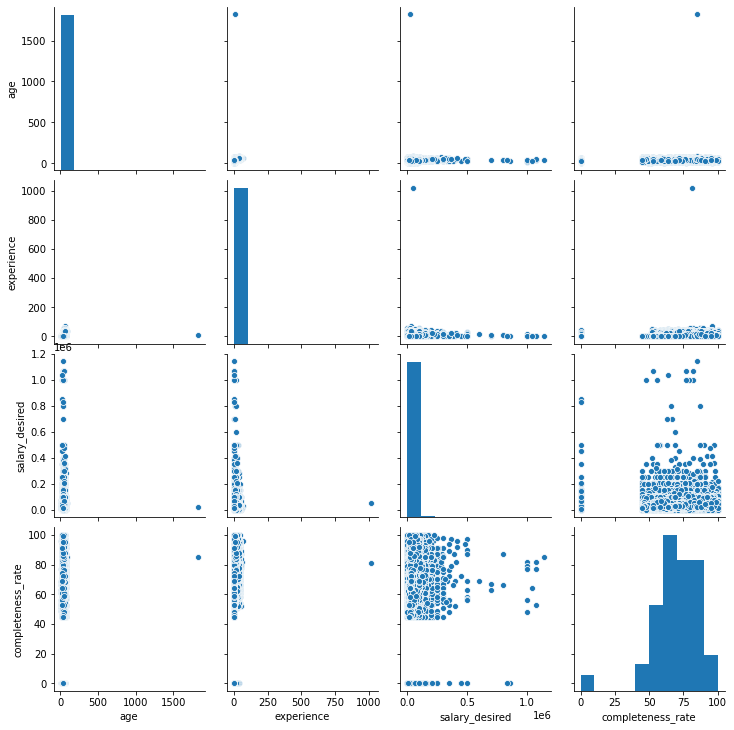

In [1021]:
df_te_digit = df_te[['age','experience','salary_desired','completeness_rate']]
sns.pairplot(df_te_digit)

In [1022]:
df_te.age = np.where((df_te.age>82)| (df_te.age < 14) ,35,df_te.age)

In [1023]:
stats(df_te,'age')

Mean  35.65606977071318
median  34.0


In [1024]:
df_te.age = df_te.age.fillna(35)
df_te.age.isna().sum()

0

In [1026]:
df_te.experience = np.where((df_te.experience>69),0,df_te.experience)
print(stats(df_te,'salary_desired'))


Mean  33669.75813468029
median  30000.0
None


In [1027]:
df_te.salary_desired = np.where((df_te.salary_desired<1000),30000,df_te.salary_desired)

In [1028]:
df_te[df_te.position.str.len() > 200].position.value_counts().count()
df_te.position = np.where((df_te.position.str.len()>200),'специалист',df_te.position)
df_te[df_te.position.str.len() > 200].position.value_counts().count()

0

In [1029]:
df_te.region = df_te.region.fillna(df_te.region.value_counts().index[0])
df_te.creation_date = df_te.creation_date.fillna(df_te.creation_date.value_counts().index[0])
df_te.modification_date = df_te.modification_date.fillna(df_te.modification_date.value_counts().index[0])

In [1030]:
df_te.locality_name = np.where((df_te.region=='Республика Башкортостан'),'уфа',df_te.locality_name)
df_te.locality_name = np.where((df_te.region=='Республика Дагестан'),'махачкала',df_te.locality_name)
df_te.locality_name = np.where((df_te.region=='Республика Бурятия'),'улан-удэ',df_te.locality_name)
df_te.locality_name = np.where((df_te.region=='Республика Адыгея'),'майкоп',df_te.locality_name)
df_te.locality_name = np.where((df_te.region=='Республика Алтай'),'горно-алтайск',df_te.locality_name)
df_te.locality_name = np.where((df_te.region=='Республика Карачаево-Черкесия'),'черкесск',df_te.locality_name)
df_te.locality_name = np.where((df_te.region=='Республика Кабардино-Балкария'),'нальчик',df_te.locality_name)
df_te.locality_name = np.where((df_te.region=='Республика Калмыкия'),'элиста',df_te.locality_name)
df_te.locality_name = df_te.locality_name.fillna(df_te.locality_name.value_counts().index[0])


In [1031]:
df_te.education_type = df_te.education_type.ffill(axis = 0)
df_te.gender = df_te.gender.ffill(axis = 0)

In [1035]:
#df_te.info()

In [1033]:
df_te = df_te[df_te.completeness_rate.notna()]

In [1034]:
df_te.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131258 entries, 0 to 131258
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   id                          131258 non-null  int64         
 1   position                    131258 non-null  object        
 2   region                      131258 non-null  object        
 3   industry                    131258 non-null  object        
 4   locality                    131258 non-null  int64         
 5   locality_name               131258 non-null  object        
 6   education_type              131258 non-null  object        
 7   drive_licences              52356 non-null   object        
 8   citizenship                 131258 non-null  object        
 9   schedule                    131258 non-null  object        
 10  employement_type            131258 non-null  object        
 11  age                         131258 non-

In [1036]:
df_te.to_pickle('clean_test_df_1912')

In [1039]:
stop = stopwords.words('russian')
stemmer = nltk.stem.snowball.RussianStemmer('russian')

In [1043]:
c13 = df_te.position +','+' '+ df_te.industry
c23 = df_te.position +','+' '+ df_te.industry +','+' '+ df_te.region
c33 = df_te.position +','+' '+ df_te.industry +','+' '+ df_te.region +','+' '+ df_te.locality_name
c43 = df_te.region +','+' '+ df_te.locality_name
c53 = df_te.schedule +','+' '+ df_te.employement_type

df_custom_features_test = pd.DataFrame(columns=custom_feature_cols)

df_custom_features_test.position_industry = c13
df_custom_features_test.position_industry_region = c23
df_custom_features_test.position_industry_region_locality = c33
df_custom_features_test.region_locality_name = c43
df_custom_features_test.schedule_employement_type = c53

In [1044]:
df_custom_features_test.position_industry_region = df_custom_features_test.position_industry_region.astype(str)
df_custom_features_test.position_industry_region_locality = df_custom_features_test.position_industry_region_locality.astype(str)
df_custom_features_test.region_locality_name = df_custom_features_test.region_locality_name.astype(str)

df_custom_features_test.position_industry_region = df_custom_features_test.position_industry_region.str.replace(r'\d+', '')
df_custom_features_test.position_industry_region_locality = df_custom_features_test.position_industry_region_locality.str.replace('\d+', '')
df_custom_features_test.region_locality_name = df_custom_features_test.region_locality_name.str.replace('\d+', '')

df_custom_features_test.position_industry_region = df_custom_features_test.position_industry_region.apply(lambda x: x.lower().replace('unknown', ''))
df_custom_features_test.position_industry_region_locality = df_custom_features_test.position_industry_region_locality.apply(lambda x: x.lower().replace('unknown', ''))
df_custom_features_test.region_locality_name = df_custom_features_test.region_locality_name.apply(lambda x: x.lower().replace('unknown', ''))

df_custom_features_test.position_industry = df_custom_features_test.position_industry.apply(lambda x: x.lower().replace('unknown', ''))
df_custom_features_test.schedule_employement_type = df_custom_features_test.schedule_employement_type.apply(lambda x: x.lower().replace('unknown', ''))

In [1045]:
df_custom_features_test.position_industry = df_custom_features_test.position_industry.apply(lambda x: data_Stemmer(x))
df_custom_features_test.schedule_employement_type = df_custom_features_test.schedule_employement_type.apply(lambda x: data_Stemmer(x))
df_custom_features_test.position_industry_region = df_custom_features_test.position_industry_region.apply(lambda x: data_Stemmer(x))
df_custom_features_test.position_industry_region_locality = df_custom_features_test.position_industry_region_locality.apply(lambda x: data_Stemmer(x))
df_custom_features_test.region_locality_name = df_custom_features_test.region_locality_name.apply(lambda x: data_Stemmer(x))

In [1046]:
df_custom_features_test.to_pickle('custom_features_test_df_1912')

In [1055]:
df_work2 = pd.read_csv('/Users/vlad3d/Hackatons/PANDEMIC_HACK/data2/pandemicdatahack/employements_mult.csv',sep=';',encoding='utf-8')

In [1060]:
html_bad_tags = ['<p>-</p>','<p>...</p>','<ul></ul>','<p>.</p>','<p>.&nbsp,</p>','<p><em></em></p>','<p>','<ol>','<li>','<strong>','</p>',
                 '</ol>','</li>','</strong>',
                 '<span style="text-decoration: underline,">',
                 '<em>','</em>','&nbsp','</span>','&bull','<p><em></em></p>']

In [684]:
#df_work2.achievements = df_work.achievements.astype(str)
#df_work2.responsibilities = df_work.responsibilities.astype(str)
#df_work2.position = df_work.position.astype(str)
#df_work2.employer = df_work.employer.astype(str)

In [735]:
work_list = ['achievements','responsibilities','position','employer']
work_list1 = ['responsibilities']

In [721]:
def replacer_symb(df,column_list,symbol_list):
    for column in column_list:
        for symbol in symbol_list:
            df[column] = df[column].str.replace(symbol,'')

In [1061]:
replacer_symb(df_work2,work_list,html_bad_tags)

In [1062]:
df_work2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923643 entries, 0 to 923642
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                892716 non-null  float64
 1   position          907375 non-null  object 
 2   employer          920164 non-null  object 
 3   achievements      152474 non-null  object 
 4   responsibilities  919830 non-null  object 
 5   start_date        921427 non-null  object 
 6   finish_date       857993 non-null  object 
dtypes: float64(1), object(6)
memory usage: 49.3+ MB


In [1065]:
df_work2.responsibilities.value_counts().head()

                                   4883
Водитель                            695
Согласно должностной инструкции     674
Уборка помещений                    614
водитель                            492
Name: responsibilities, dtype: int64

In [1068]:
df_work2 = df_work2.drop(['achievements'],axis=1)

In [1070]:
df_work2 = df_work2.dropna()

In [1071]:
df_work2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815217 entries, 0 to 892715
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                815217 non-null  float64
 1   position          815217 non-null  object 
 2   employer          815217 non-null  object 
 3   responsibilities  815217 non-null  object 
 4   start_date        815217 non-null  object 
 5   finish_date       815217 non-null  object 
dtypes: float64(1), object(5)
memory usage: 43.5+ MB


In [1072]:
df_work2.to_pickle('employ_mult_df_1912')

In [763]:
df_work3 = pd.read_csv('/Users/vlad3d/Hackatons/PANDEMIC_HACK/data2/pandemicdatahack/employements_mult.csv',sep=';',encoding='utf-8')

In [773]:
#df_work3.responsibilities.value_counts().head(50)

In [774]:
df_work2.head()

,id,position,employer,achievements,responsibilities,start_date,finish_date
0,0.0,специалист,"АО ""РТК""",NaN,"Консультирование клиентов и продажа товара, ра...",2017-06-01,2019-06-01
1,0.0,специалист,"ООО ""Евросеть-Ритейл""",NaN,"Консультирование клиентов и продажа товара, ра...",2017-05-01,2017-06-01
2,0.0,NaN,"АО ""МегаФон Ритейл""",NaN,"Консультирование клиентов и продажа товара, ра...",2019-06-01,2019-11-01
3,0.0,NaN,"ПАО ""МегаФон""",NaN,Консультирование клиентов по телефону. Продажа...,2019-06-01,2020-04-01
4,1.0,Копирайтер/рерайтер,WorkHardOnline,NaN,"✑Фриланс✑✑,копирайтинг и рерайтинг статей на р...",2019-10-01,NaN


In [717]:
for elem in df_work2.columns:
    value_counter(df_work2,elem)

Колонка id
144864.0    40
389189.0    39
397475.0    32
191864.0    32
376738.0    31
Name: id, dtype: int64
Количество величин 343355
Количество NAN - 30927
**********************

Колонка position
Бухгалтер               16954
Администратор            8887
Продавец-консультант     8158
Продавец                 7968
бухгалтер                7171
Name: position, dtype: int64
Количество величин 231579
Количество NAN - 16268
**********************

Колонка employer
ПАО Сбербанк    2365
АО Тандер       1242
ОАО РЖД         1177
ИП              1101
Почта России    1084
Name: employer, dtype: int64
Количество величин 644027
Количество NAN - 3479
**********************

Колонка achievements
<p>нет</p>                                                  1205
<ol><li></li></ol>                                          1062
<p><span style="text-decoration: underline,"></span></p>     996
<p>Нет</p>                                                   956
<p>-</p>                                     

In [762]:
df_work2.responsibilities.value_counts().head(50)

.                                            1695
-                                            1485
                                              947
Водитель                                      695
Согласно должностной инструкции               674
Уборка помещений                              614
водитель                                      492
Работа с документами                          483
Продажи                                       475
согласно должностной инструкции               385
уборка помещений                              380
Работа с клиентами                            344
Перевозка грузов                              308
Перевозка пассажиров                          297
Делопроизводство                              279
Приготовление пищи                            278
Продавец                                      278
Продажа                                       267
Охрана объекта                                264
Охрана                                        256


In [718]:
df_work2 = df_work2.applymap(lambda s:s.lower() if type(s) == str else s)

In [719]:
df_work2.head()

,id,position,employer,achievements,responsibilities,start_date,finish_date
0,0.0,специалист,"ао ""ртк""",NaN,"<p>консультирование клиентов и продажа товара,...",2017-06-01,2019-06-01
1,0.0,специалист,"ооо ""евросеть-ритейл""",NaN,"<p>консультирование клиентов и продажа товара,...",2017-05-01,2017-06-01
2,0.0,NaN,"ао ""мегафон ритейл""",NaN,"<p>консультирование клиентов и продажа товара,...",2019-06-01,2019-11-01
3,0.0,NaN,"пао ""мегафон""",NaN,<p>консультирование клиентов по телефону. прод...,2019-06-01,2020-04-01
4,1.0,копирайтер/рерайтер,workhardonline,NaN,<p><strong>✑</strong><strong>фриланс</strong><...,2019-10-01,NaN


In [706]:
df_work2.head()

,id,position,employer,achievements,responsibilities,start_date,finish_date
0,0.0,специалист,"ао ""ртк""",NaN,"<p>консультирование клиентов и продажа товара,...",2017-06-01,2019-06-01
1,0.0,специалист,"ооо ""евросеть-ритейл""",NaN,"<p>консультирование клиентов и продажа товара,...",2017-05-01,2017-06-01
2,0.0,NaN,"ао ""мегафон ритейл""",NaN,"<p>консультирование клиентов и продажа товара,...",2019-06-01,2019-11-01
3,0.0,NaN,"пао ""мегафон""",NaN,<p>консультирование клиентов по телефону. прод...,2019-06-01,2020-04-01
4,1.0,копирайтер/рерайтер,workhardonline,NaN,<p><strong>✑</strong><strong>фриланс</strong><...,2019-10-01,NaN


In [578]:
df_work.responsibilities.value_counts().head() #надо чисить от п

<p>-</p>                   657
<p>.</p>                   558
<p>Уборка помещений</p>    318
<ol><li></li></ol>         287
<p>Водитель</p>            276
Name: responsibilities, dtype: int64

In [ ]:
html_bad_tags = ['<p>','<ol>','<li>','<strong>','</p>',
                 '</ol>','</li>','</strong>',
                 '<span style="text-decoration: underline,">',
                 '<em>','</em>','&nbsp']

In [579]:
df_work.achievements = df_work.achievements.astype(str)
df_work.responsibilities = df_work.responsibilities.astype(str)
df_work.position = df_work.position.astype(str)
df_work.employer = df_work.employer.astype(str)

In [ ]:
work_list = ['achievements','responsibilities','position','employer']

In [581]:
df_work.position = df_work.position.str.replace('<p>','')

In [582]:
def replacer_symb(df,column_list,symbol_list):
    for column in column_list:
        for symbol in symbol_list:
            df[column] = df[column].str.replace(symbol,'')

In [ ]:
replacer_symb

In [600]:
# df_tr['creation_date'] = pd.to_datetime(df_tr['creation_date'])
# df_tr['modification_date'] = pd.to_datetime(df_tr['modification_date'])
# df_tr['publish_date'] = pd.to_datetime(df_tr['publish_date'])
df_time = df_tr[['creation_date','modification_date','publish_date']]
# train['del_mod_cre']=train.modification_date - train.creation_date
# train['del_mod_pub']=train.modification_date - train.publish_date

In [601]:
df_time['del_mod_cre'] = df_time.modification_date - df_time.creation_date
df_time['del_mod_pub'] = df_time.modification_date - df_time.publish_date

/Users/vlad3d/opt/anaconda3/envs/TensorFlow2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/vlad3d/opt/anaconda3/envs/TensorFlow2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [608]:
df_time['del_mod_cre'] = df_time['del_mod_cre'].dt.days
df_time['del_mod_pub'] = df_time['del_mod_pub'].dt.days

/Users/vlad3d/opt/anaconda3/envs/TensorFlow2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/vlad3d/opt/anaconda3/envs/TensorFlow2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [609]:
df_time.del_mod_cre.min()

0.0

In [612]:
df_time.head(10)

,creation_date,modification_date,publish_date,del_mod_cre,del_mod_pub
0,2020-05-07,2020-05-08,2020-05-07,1.0,1.0
1,2020-10-21,2020-10-27,2020-10-27,6.0,0.0
2,2019-04-25,2020-02-04,2020-02-04,285.0,0.0
3,2020-09-19,2020-09-20,2020-09-19,1.0,1.0
4,2020-04-20,2020-09-09,2020-04-21,142.0,141.0
5,2019-08-09,2019-08-09,2019-08-09,0.0,0.0
6,2020-07-23,2020-10-22,2020-08-01,91.0,82.0
7,2020-05-26,2020-05-27,2020-05-27,1.0,0.0
8,2020-04-25,2020-07-27,2020-04-25,93.0,93.0
9,2020-04-17,2020-07-10,2020-04-20,84.0,81.0


In [614]:
df_time.shape

(300704, 5)

In [613]:
df_time.to_pickle('time_diff_df')

In [686]:
#test


In [687]:
df_test = pd.read_csv('/Users/vlad3d/Hackatons/PANDEMIC_HACK/data/pandemicdatahack/test.csv',sep=';',encoding='utf-8')

/Users/vlad3d/opt/anaconda3/envs/TensorFlow2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [689]:
c11 = df_test.position +','+' '+ df_test.industry
c21 = df_test.position +','+' '+ df_test.industry +','+' '+ df_test.region
c31 = df_test.position +','+' '+ df_test.industry +','+' '+ df_test.region +','+' '+ df_test.locality_name
c41 = df_test.region +','+' '+ df_test.locality_name
c51 = df_test.schedule +','+' '+ df_test.employement_type
df_custom_features_train = pd.DataFrame(columns=custom_feature_cols)
df_custom_features_train.position_industry = c11
df_custom_features_train.position_industry_region = c21
df_custom_features_train.position_industry_region_locality = c31
df_custom_features_train.region_locality_name = c41
df_custom_features_train.schedule_employement_type = c51

In [692]:
df_custom_features_train.position_industry_region = df_custom_features_train.position_industry_region.astype(str)
df_custom_features_train.position_industry_region_locality = df_custom_features_train.position_industry_region_locality.astype(str)
df_custom_features_train.region_locality_name = df_custom_features_train.region_locality_name.astype(str)

df_custom_features_train.position_industry_region = df_custom_features_train.position_industry_region.str.replace(r'\d+', '')
df_custom_features_train.position_industry_region_locality = df_custom_features_train.position_industry_region_locality.str.replace('\d+', '')
df_custom_features_train.region_locality_name = df_custom_features_train.region_locality_name.str.replace('\d+', '')

df_custom_features_train.position_industry_region = df_custom_features_train.position_industry_region.apply(lambda x: x.lower().replace('unknown', ''))
df_custom_features_train.position_industry_region_locality = df_custom_features_train.position_industry_region_locality.apply(lambda x: x.lower().replace('unknown', ''))
df_custom_features_train.region_locality_name = df_custom_features_train.region_locality_name.apply(lambda x: x.lower().replace('unknown', ''))

df_custom_features_train.position_industry = df_custom_features_train.position_industry.apply(lambda x: x.lower().replace('unknown', ''))
df_custom_features_train.schedule_employement_type = df_custom_features_train.schedule_employement_type.apply(lambda x: x.lower().replace('unknown', ''))

In [693]:
df_custom_features_train.position_industry = df_custom_features_train.position_industry.apply(lambda x: data_Stemmer(x))
df_custom_features_train.schedule_employement_type = df_custom_features_train.schedule_employement_type.apply(lambda x: data_Stemmer(x))
df_custom_features_train.position_industry_region = df_custom_features_train.position_industry_region.apply(lambda x: data_Stemmer(x))
df_custom_features_train.position_industry_region_locality = df_custom_features_train.position_industry_region_locality.apply(lambda x: data_Stemmer(x))
df_custom_features_train.region_locality_name = df_custom_features_train.region_locality_name.apply(lambda x: data_Stemmer(x))

In [696]:
df_custom_features_train.shape

(131259, 5)

In [697]:
df_custom_features_train.to_pickle('custom_features_train_df')

In [744]:
train_modif = pd.read_pickle('/Users/vlad3d/Hackatons/PANDEMIC_HACK/data_irina/train_modif.pkl')

In [745]:
train_modif.head()

,day_num,publish_date,id,education_type,type_education_type_0,type_education_type_1,type_education_type_2,type_education_type_3,type_education_type_4,type_education_type_5,...,day_year,vm_schedule,prd_schedule,cg_schedule,gg_schedule,nrd_schedule,neprd_schedule,employement_type_code,employement_type_code_enc,gender_code_enc
0,0,2015-05-21,251360,средний профессиональный,0.008305,0.044853,0.008305,0.044848,0.008305,0.008305,...,141,1,0,0,0,0,0,1,1.000000,1.125000
1,1,2015-07-03,167701,nan,0.010000,0.010000,0.081429,0.010000,0.010000,0.010000,...,184,1,1,0,0,0,0,1,1.250000,1.500000
2,2,2015-07-08,220081,высокий,0.010000,0.010000,0.010000,0.010000,0.045714,0.045714,...,189,0,1,0,0,0,0,1,1.167939,1.217391
3,2,2015-07-08,71198,nan,0.010000,0.010000,0.081429,0.010000,0.010000,0.010000,...,189,0,1,0,0,0,0,1,1.153447,1.444444
4,3,2015-07-10,282404,высокий,0.010000,0.010000,0.010000,0.010000,0.045714,0.045714,...,191,0,1,0,0,0,0,1,1.130588,1.521739


In [761]:
train_modif.education_type.value_counts()

высокий                     135436
средний профессиональный     79375
nan                          40032
средний                      38991
незаконченный высокий        12436
Name: education_type, dtype: int64

In [760]:
train_modif.education_type.isna().sum()

0

In [781]:
df_tr.age.isna().sum()

0

In [787]:
df_tr.dtypes

id                                     int64
position                              object
region                                object
industry                              object
locality                               int64
locality_name                         object
education_type                        object
drive_licences                        object
citizenship                           object
schedule                              object
employement_type                      object
age                                  float64
gender                                object
experience                             int64
salary_desired                         int64
relocation_ready                        bool
travel_ready                            bool
retraining_ready                        bool
is_worldskills_participant            object
has_qualifications                      bool
completeness_rate                    float64
creation_date                 datetime64[ns]
modificati